In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [11]:
df = pd.read_csv("youtube_trending_videos_global.csv")


/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_82266/2336418222.py:1: DtypeWarning: Columns (13,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("youtube_trending_videos_global.csv")


In [12]:
df.head()

,video_id,video_published_at,video_trending__date,video_trending_country,channel_id,video_title,video_description,video_default_thumbnail,video_category_id,video_tags,...,channel_description,channel_custom_url,channel_published_at,channel_country,channel_view_count,channel_subscriber_count,channel_have_hidden_subscribers,channel_video_count,channel_localized_title,channel_localized_description
0,bB3-CUMERIU,2024-10-11T00:00:06Z,2024.10.12,United Arab Emirates,UCNYi_zGmR519r5gYdOKLTjQ,JENNIE - Mantra (Official Music Video),Official music video for “Mantra” by JENNIE ou...,https://i.ytimg.com/vi/bB3-CUMERIU/default.jpg,Music,"JENNIE,Mantra,제니,Jennie Mantra,Jennie from Bla...",...,NaN,@jennierubyjane,2021-01-13T06:19:55.86689Z,NaN,464615150.0,11600000.0,False,43.0,JENNIE,NaN
1,5ObJt_71AYc,2024-10-11T02:59:21Z,2024.10.12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,CHILE vs. BRASIL [1-2] | RESUMEN | ELIMINATORI...,#Chile #Brasil #eliminatoriassudamericanas #Cr...,https://i.ytimg.com/vi/5ObJt_71AYc/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,Canal Oficial de la Confederación Sudamericana...,@conmebol,2014-02-19T20:24:31Z,NaN,399046746.0,1610000.0,False,4637.0,CONMEBOL,Canal Oficial de la Confederación Sudamericana...
2,zfb0whgBBA8,2024-10-11T11:07:25Z,2024.10.12,United Arab Emirates,UCgGYPnVJytkr6sVNLQ-l0zQ,تحدي الحقيبة مع ابو عبير 🔥 | سلسلتنا #2,"1,375,547 مشترك❤️\n\nـــــــــــــــــــــــــ...",https://i.ytimg.com/vi/zfb0whgBBA8/default.jpg,Gaming,"تشكيله,فيفا,فيفا20,التمت,درافت,زلاتان,ام,جي,مل...",...,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚,@mrlle99,2012-08-01T16:24:26Z,Saudi Arabia,114331110.0,1380000.0,False,314.0,LLE عبدالاله,صانع محتوى وانزل مقاطع بشكل غير منظم 🌚
3,SJfoPdeOPCQ,2024-10-11T00:10:10Z,2024.10.12,United Arab Emirates,UCzU8-lZlRfkV3nj0RzAZdrQ,VENEZUELA vs. ARGENTINA [1-1] | RESUMEN | ELIM...,#Venezuela #Argentina #eliminatoriassudamerica...,https://i.ytimg.com/vi/SJfoPdeOPCQ/default.jpg,Sports,"fútbol,pelota,gol,copa,libertadores,sudamerica...",...,Canal Oficial de la Confederación Sudamericana...,@conmebol,2014-02-19T20:24:31Z,NaN,399046746.0,1610000.0,False,4637.0,CONMEBOL,Canal Oficial de la Confederación Sudamericana...
4,UVb6QOKy0bI,2024-10-09T12:30:27Z,2024.10.12,United Arab Emirates,UCOzubmwpVZI7gD0Jf7Bk3Aw,Bougainvillea Trailer | October 17 | Jyothirma...,Presenting The Official Trailer of Bougainvill...,https://i.ytimg.com/vi/UVb6QOKy0bI/default.jpg,Film & Animation,NaN,...,Official YouTube Channel Of Amal Neerad Produc...,@amalneeradproductions5264,2017-05-31T14:31:01Z,NaN,19991522.0,40600.0,False,56.0,Amal Neerad Productions,Official YouTube Channel Of Amal Neerad Produc...


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058053 entries, 0 to 2058052
Data columns (total 28 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   video_id                         object 
 1   video_published_at               object 
 2   video_trending__date             object 
 3   video_trending_country           object 
 4   channel_id                       object 
 5   video_title                      object 
 6   video_description                object 
 7   video_default_thumbnail          object 
 8   video_category_id                object 
 9   video_tags                       object 
 10  video_duration                   object 
 11  video_dimension                  object 
 12  video_definition                 object 
 13  video_licensed_content           object 
 14  video_view_count                 float64
 15  video_like_count                 float64
 16  video_comment_count              float64
 17  channel_

In [14]:
df.describe()

,video_view_count,video_like_count,video_comment_count,channel_view_count,channel_subscriber_count,channel_video_count
count,2.057524e+06,2.035329e+06,2.044456e+06,2.058043e+06,2.058043e+06,2.058043e+06
mean,1.440759e+07,4.287809e+05,8.018391e+03,5.171853e+09,1.319378e+07,5.480483e+03
std,3.041354e+07,9.189491e+05,2.657615e+04,1.195309e+10,3.897508e+07,2.407897e+04
min,1.051200e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.128485e+05,2.206700e+04,6.000000e+02,2.616591e+08,8.410000e+05,2.400000e+02
50%,2.412240e+06,8.021300e+04,1.743000e+03,1.144845e+09,3.330000e+06,7.450000e+02
75%,1.271548e+07,3.782070e+05,4.810000e+03,4.684711e+09,1.130000e+07,1.793000e+03
max,4.075230e+08,9.806944e+06,6.009910e+05,2.875215e+11,3.690000e+08,6.204610e+05


In [15]:
# Checking missing values
print(df.isnull().sum())

video_id                                5
video_published_at                      0
video_trending__date                    0
video_trending_country                  0
channel_id                              0
video_title                             0
video_description                  332458
video_default_thumbnail                 0
video_category_id                    1543
video_tags                         675868
video_duration                          5
video_dimension                         5
video_definition                        5
video_licensed_content                  5
video_view_count                      529
video_like_count                    22724
video_comment_count                 13597
channel_title                           5
channel_description                149342
channel_custom_url                   6826
channel_published_at                   10
channel_country                    320316
channel_view_count                     10
channel_subscriber_count          

In [17]:
# Replacing specific columns with 'NA' for missing values
df['video_description'].fillna('NA', inplace=True) 
df['video_category_id'].fillna('NA', inplace=True)  # done
df['channel_description'].fillna('NA', inplace=True) 
df['video_tags'].fillna('NA', inplace=True)  # done
df['channel_country'].fillna('NA', inplace=True) # done

/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_82266/1507616294.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video_description'].fillna('NA', inplace=True)
/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_82266/1507616294.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [21]:
# Dropping unnecessary columns
drop_columns = ['video_id', 'channel_localized_description', 'channel_custom_url']
df = df.drop(columns=[col for col in drop_columns if col in df.columns])

In [20]:
# Replace missing numerical values with median
df['video_view_count'].fillna(df['video_view_count'].median(), inplace=True)
df['video_like_count'].fillna(df['video_like_count'].median(), inplace=True)
df['video_comment_count'].fillna(df['video_comment_count'].median(), inplace=True)

/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_82266/568595703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['video_view_count'].fillna(df['video_view_count'].median(), inplace=True)
/var/folders/k9/62mpfz413bxfg1_cth95xn5c0000gn/T/ipykernel_82266/568595703.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

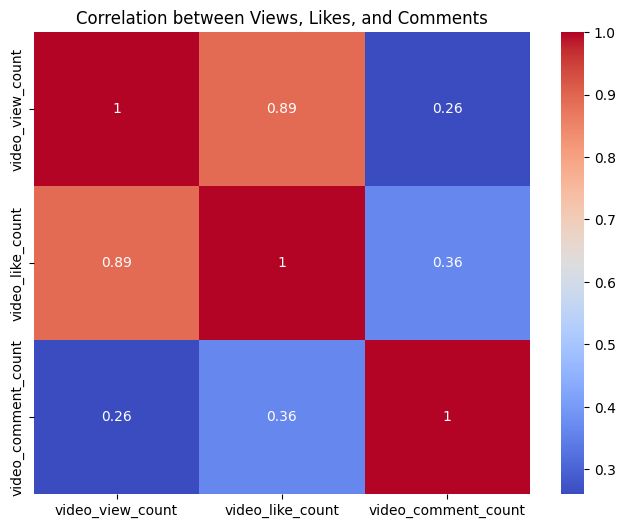

In [23]:
# Audience Engagement Insights
plt.figure(figsize=(8, 6))
sns.heatmap(df[['video_view_count', 'video_like_count', 'video_comment_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between Views, Likes, and Comments")
plt.show()

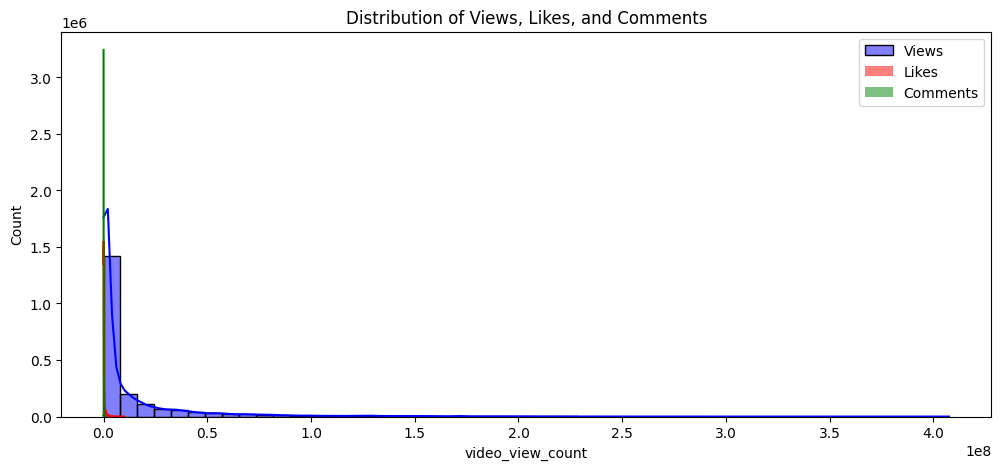

In [32]:
plt.figure(figsize=(12, 5))
sns.histplot(df['video_view_count'], bins=50, kde=True, color='blue', label='Views')
sns.histplot(df['video_like_count'], bins=50, kde=True, color='red', label='Likes')
sns.histplot(df['video_comment_count'], bins=50, kde=True, color='green', label='Comments')
plt.legend()
plt.title("Distribution of Views, Likes, and Comments")
plt.show()


<Figure size 1400x700 with 0 Axes>

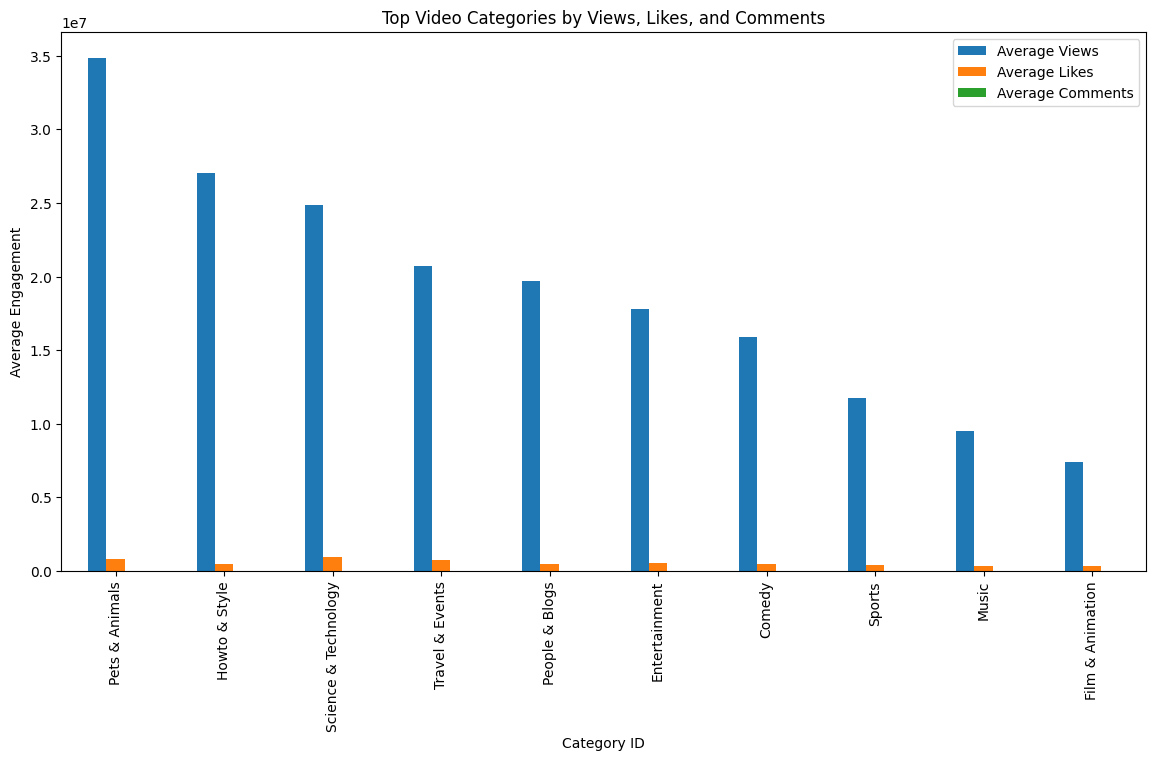

In [33]:
plt.figure(figsize=(14, 7))
top_categories = df.groupby('video_category_id')[['video_view_count', 'video_like_count', 'video_comment_count']].mean().sort_values(by='video_view_count', ascending=False).head(10)
top_categories.plot(kind='bar', figsize=(14, 7))
plt.xticks(rotation=90)
plt.xlabel("Category ID")
plt.ylabel("Average Engagement")
plt.title("Top Video Categories by Views, Likes, and Comments")
plt.legend(["Average Views", "Average Likes", "Average Comments"])
plt.show()


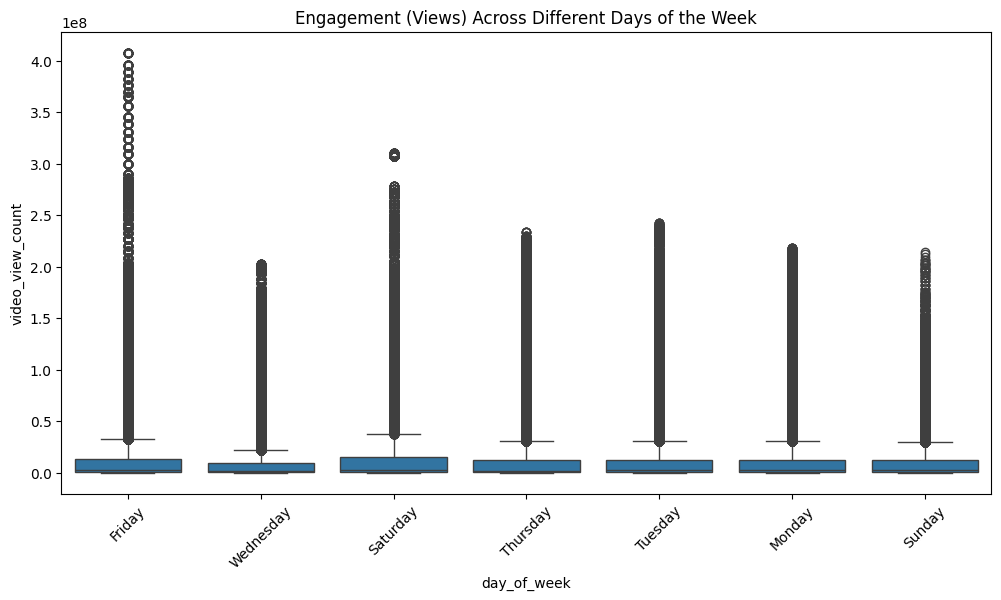

In [34]:
df['day_of_week'] = df['video_published_at'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='video_view_count', data=df)
plt.xticks(rotation=45)
plt.title("Engagement (Views) Across Different Days of the Week")
plt.show()



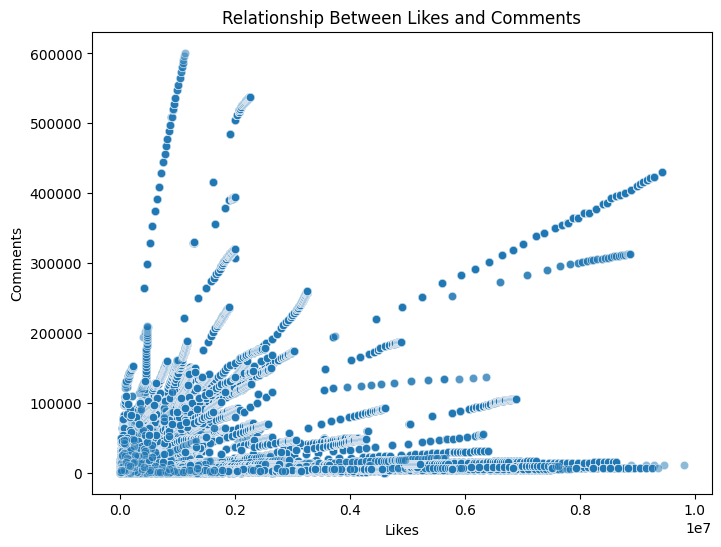

In [35]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['video_like_count'], y=df['video_comment_count'], alpha=0.5)
plt.xlabel("Likes")
plt.ylabel("Comments")
plt.title("Relationship Between Likes and Comments")
plt.show()


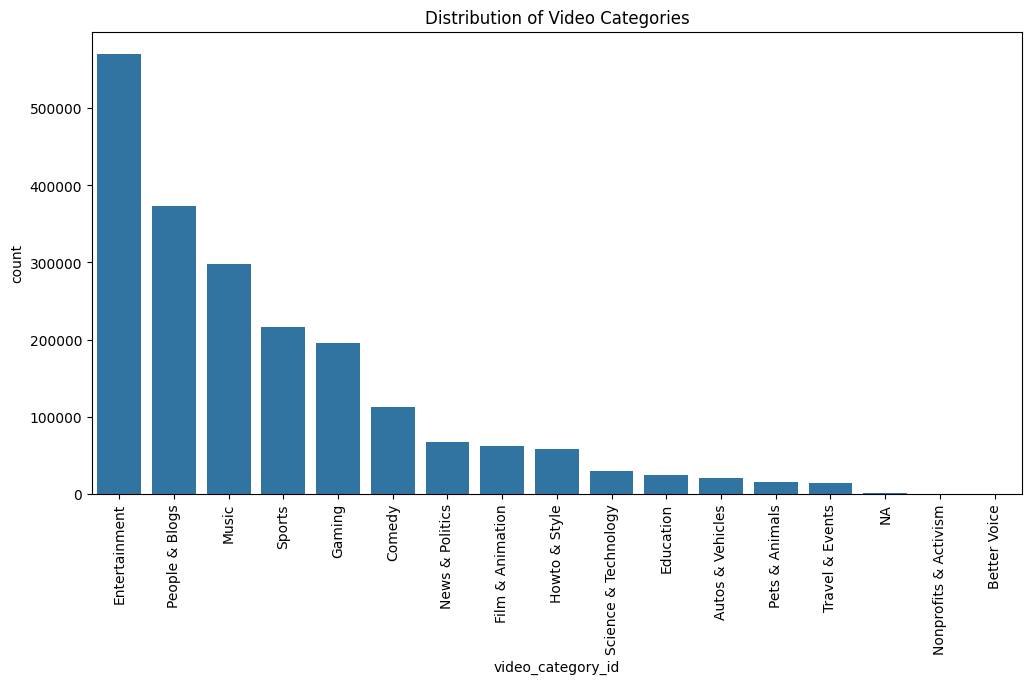

In [24]:
# Content Category Insights
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='video_category_id', order=df['video_category_id'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Video Categories")
plt.show()

In [48]:
pip install --upgrade textblob


Python(85095) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 624 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.5 MB 30.8 MB/s eta 0:00:01
     |████████████████████████████████| 78 kB 21.4 MB/s eta 0:00:01
     |████████████████████████████████| 284 kB 24.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 20.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install --upgrade wordcloud


Python(85324) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 168 kB 2.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [62]:
from wordcloud import WordCloud
import nltk
from collections import Counter


In [51]:
from textblob import TextBlob

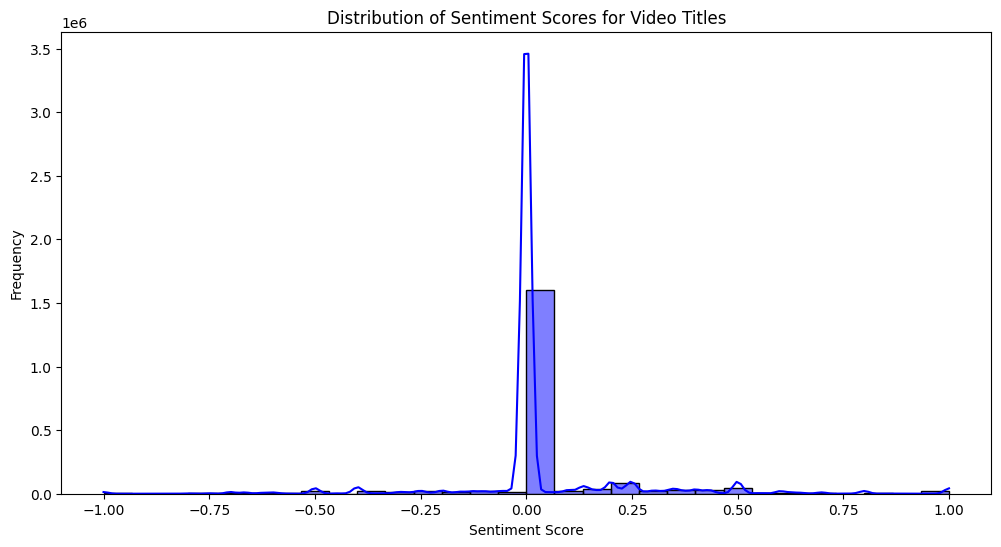

In [52]:
# Sentiment Analysis on Video Titles
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['title_sentiment'] = df['video_title'].apply(get_sentiment)

plt.figure(figsize=(12, 6))
sns.histplot(df['title_sentiment'], bins=30, kde=True, color='blue')
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.title("Distribution of Sentiment Scores for Video Titles")
plt.show()

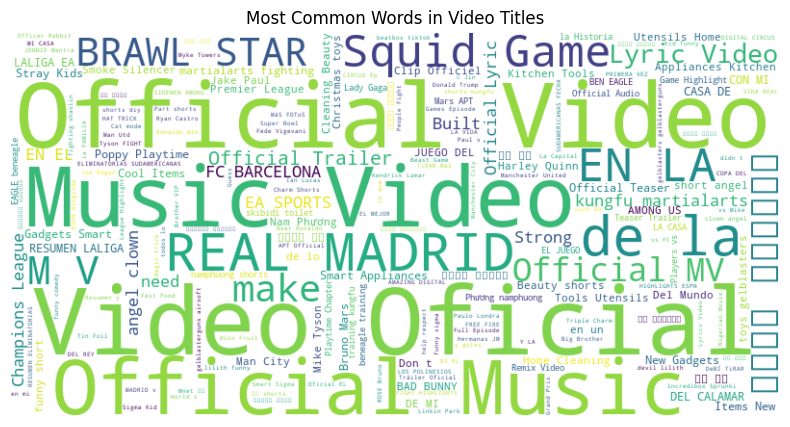

In [63]:
# Word Cloud for Most Frequent Words in Titles
text = " ".join(df['video_title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Video Titles")
plt.show()